In [1]:
!pip install xgboost

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC as svm
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import xgboost
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier as kn
from sklearn.preprocessing import StandardScaler, LabelEncoder
import seaborn as sns
from sklearn import tree
from sklearn.naive_bayes import GaussianNB, BernoulliNB

In [3]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
dsG = pd.read_csv('/content/drive/MyDrive/datasets/Project5/gender_submission.csv')
dsTr = pd.read_csv('/content/drive/MyDrive/datasets/Project5/train (1).csv')
dsTe = pd.read_csv('/content/drive/MyDrive/datasets/Project5/test.csv')

In [5]:
dsTr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
dsTr = dsTr.drop(['Cabin', 'Name', 'Ticket', 'PassengerId'], axis=1)
dsTe = dsTe.drop(['Cabin', 'Name', 'Ticket', 'PassengerId'], axis=1)
dsG = dsG.drop(['PassengerId'], axis=1)

In [7]:
y_test = dsG

In [8]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

df_Tr = pd.get_dummies(dsTr, columns=['Sex'], drop_first=True)
df_Te = pd.get_dummies(dsTe, columns=['Sex'], drop_first=True)

df_Tr2 = df_Tr['Embarked'].fillna(df_Tr['Embarked'].mode()[0], inplace=True)
df_Te2 = df_Te['Embarked'].fillna(df_Te['Embarked'].mode()[0], inplace=True)

df_Tr2 = df_Tr['Age'].fillna(df_Tr['Age'].median(), inplace=True)
df_Te2 = df_Te['Age'].fillna(df_Te['Age'].median(), inplace=True)
df_Te2 = df_Te['Fare'].fillna(df_Te['Fare'].median(), inplace=True)

# Remove inplace=True and reassign the result back to the DataFrames
df_Tr['Embarked'] = df_Tr['Embarked'].fillna(df_Tr['Embarked'].mode()[0])
df_Te['Embarked'] = df_Te['Embarked'].fillna(df_Te['Embarked'].mode()[0])

# Now use df_Tr and df_Te for creating dummies
df_Tr2 = pd.get_dummies(df_Tr, columns=['Embarked'], drop_first=True)
df_Te2 = pd.get_dummies(df_Te, columns=['Embarked'], drop_first=True)

<ipython-input-8-d68179876a1d>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_Tr2 = df_Tr['Embarked'].fillna(df_Tr['Embarked'].mode()[0], inplace=True)
<ipython-input-8-d68179876a1d>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value

In [9]:
df_Tr2.isnull().sum()

,0
Survived,0
Pclass,0
Age,0
SibSp,0
Parch,0
Fare,0
Sex_male,0
Embarked_Q,0
Embarked_S,0


In [10]:
df_Tr2.iloc[:, -3:] = df_Tr2.iloc[:, -3:].astype(int)
df_Te2.iloc[:, -3:] = df_Te2.iloc[:, -3:].astype(int)

<ipython-input-10-4cb4cbd46f46>:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: Sex_male, Length: 891, dtype: int64' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  df_Tr2.iloc[:, -3:] = df_Tr2.iloc[:, -3:].astype(int)
<ipython-input-10-4cb4cbd46f46>:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0      0
1      0
2      0
3      0
4      0
      ..
886    0
887    0
888    0
889    0
890    1
Name: Embarked_Q, Length: 891, dtype: int64' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  df_Tr2.iloc[:, -3:] = df_Tr2.iloc[:, -3:].astype(int)
<ipython-input-10-4cb4cbd46f46>:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a fu

In [11]:
x_train = df_Tr2.drop(columns=['Survived'])
y_train = df_Tr2['Survived']
x_test = df_Te2

In [12]:
model = RF(n_estimators=30, max_depth=200,random_state=64)
model.fit(x_train, y_train)
pred = model.predict(x_test)
accuracy = accuracy_score(y_test, pred)
print(accuracy)
print(classification_report(pred, y_test, labels=None, digits=4))

0.8157894736842105
              precision    recall  f1-score   support

           0     0.8534    0.8566    0.8550       265
           1     0.7500    0.7451    0.7475       153

    accuracy                         0.8158       418
   macro avg     0.8017    0.8009    0.8013       418
weighted avg     0.8155    0.8158    0.8157       418



Confusion matrix, without normalization
[[227  39]
 [ 38 114]]


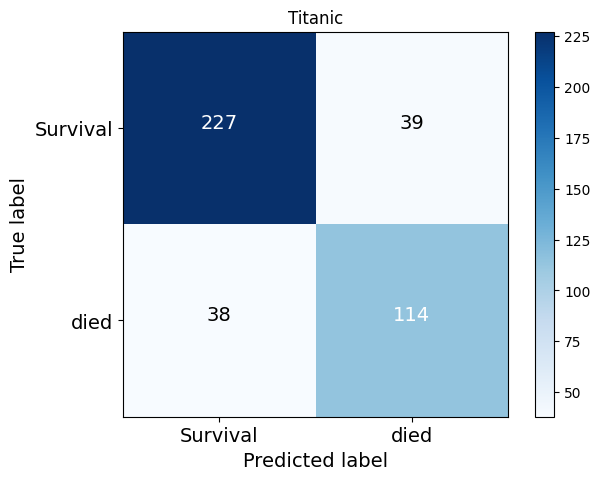

In [13]:
cm = confusion_matrix(y_test, pred)
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Titanic',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, fontsize=14)
    plt.yticks(tick_marks, classes, fontsize=14)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center", fontsize=14,
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label', fontsize=14)
    plt.xlabel('Predicted label', fontsize=14)


# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, pred)
np.set_printoptions(precision=2)
class_names= ['Survival', 'died']
#class_names= ['cardboard', 'metal']
# Plot non-normalized confusion matrix
plt.figure(figsize=(7,5))
plot_confusion_matrix(cnf_matrix, classes=class_names)

In [14]:
model = GaussianNB(var_smoothing=1e-9)
model.fit(x_train, y_train)
pred = model.predict(x_test)
accuracy = accuracy_score(y_test, pred)
print(accuracy)
print(classification_report(y_test, pred))

0.9186602870813397
              precision    recall  f1-score   support

           0       0.98      0.89      0.93       266
           1       0.84      0.96      0.90       152

    accuracy                           0.92       418
   macro avg       0.91      0.93      0.91       418
weighted avg       0.93      0.92      0.92       418



Confusion matrix, without normalization
[[238  28]
 [  6 146]]


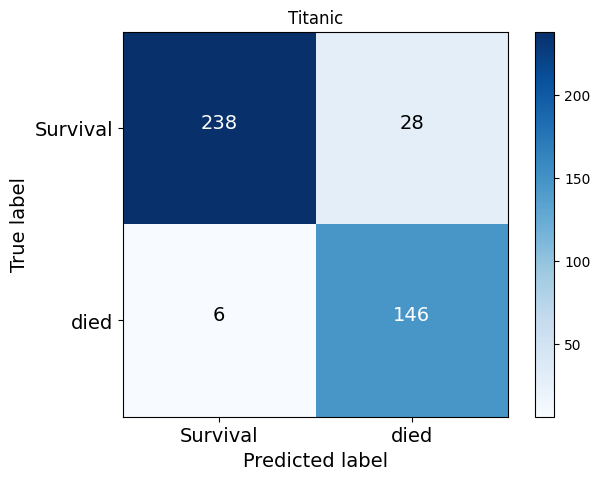

In [15]:
cm = confusion_matrix(y_test, pred)
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Titanic',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, fontsize=14)
    plt.yticks(tick_marks, classes, fontsize=14)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center", fontsize=14,
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label', fontsize=14)
    plt.xlabel('Predicted label', fontsize=14)


# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, pred)
np.set_printoptions(precision=2)
class_names= ['Survival', 'died']
#class_names= ['cardboard', 'metal']
# Plot non-normalized confusion matrix
plt.figure(figsize=(7,5))
plot_confusion_matrix(cnf_matrix, classes=class_names)

In [16]:
model=XGBClassifier(base_score=0.6, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.5,
              learning_rate=0.1, max_delta_step=0, max_depth=200,
              min_child_weight=1, missing=1, n_estimators=200, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=40,
              reg_alpha=1, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)
model.fit(x_train, y_train)
pred = model.predict(x_test)
accuracy = accuracy_score(y_test, pred)
print(accuracy)
print(classification_report(y_test, pred))

0.8947368421052632
              precision    recall  f1-score   support

           0       0.90      0.94      0.92       266
           1       0.89      0.81      0.85       152

    accuracy                           0.89       418
   macro avg       0.89      0.88      0.88       418
weighted avg       0.89      0.89      0.89       418



Confusion matrix, without normalization
[[251  15]
 [ 29 123]]


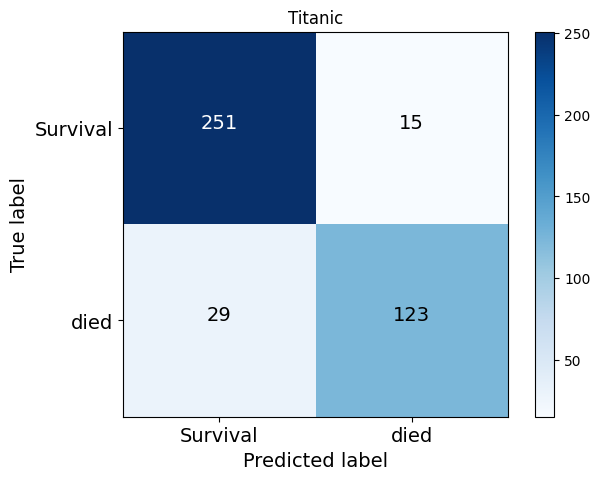

In [17]:
cm = confusion_matrix(y_test, pred)
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Titanic',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, fontsize=14)
    plt.yticks(tick_marks, classes, fontsize=14)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center", fontsize=14,
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label', fontsize=14)
    plt.xlabel('Predicted label', fontsize=14)


# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, pred)
np.set_printoptions(precision=2)
class_names= ['Survival', 'died']
#class_names= ['cardboard', 'metal']
# Plot non-normalized confusion matrix
plt.figure(figsize=(7,5))
plot_confusion_matrix(cnf_matrix, classes=class_names)

In [18]:
model = RF(criterion = "gini", max_depth = 30, min_samples_split=55, random_state=54)
model.fit(x_train , y_train)
pred = model.predict(x_test)

accuracy = accuracy_score(y_test,pred)
print(accuracy)
print(classification_report(y_test,pred, labels=None, digits=4))

0.8995215311004785
              precision    recall  f1-score   support

           0     0.8862    0.9662    0.9245       266
           1     0.9297    0.7829    0.8500       152

    accuracy                         0.8995       418
   macro avg     0.9079    0.8745    0.8872       418
weighted avg     0.9020    0.8995    0.8974       418



Confusion matrix, without normalization
[[257   9]
 [ 33 119]]


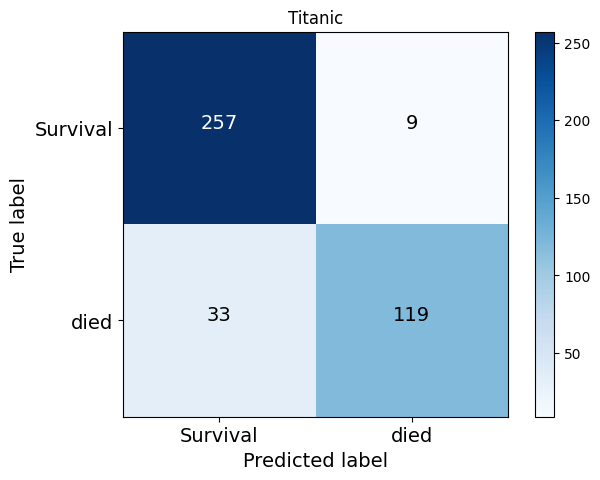

In [19]:
cm = confusion_matrix(y_test, pred)
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Titanic',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, fontsize=14)
    plt.yticks(tick_marks, classes, fontsize=14)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center", fontsize=14,
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label', fontsize=14)
    plt.xlabel('Predicted label', fontsize=14)


# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, pred)
np.set_printoptions(precision=2)
class_names= ['Survival', 'died']
#class_names= ['cardboard', 'metal']
# Plot non-normalized confusion matrix
plt.figure(figsize=(7,5))
plot_confusion_matrix(cnf_matrix, classes=class_names)